In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(139, 180, 3)
(180, 3)
(180, 3)
(3,)
(139, 180)
None


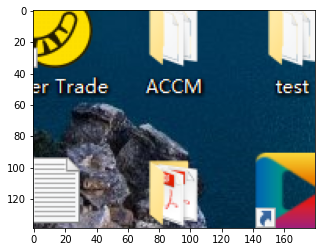

In [13]:
img = cv2.imread(r"./testPic.png")
print(img.shape)
print(img[0].shape)
print(img[1].shape)
print(img[138][110].shape)
print(img.shape[:2])
plt.imshow(img[:,:,::-1])

(255, 255, 3) 195075


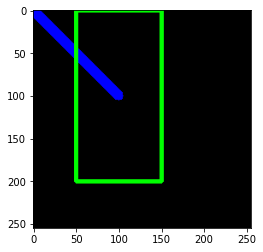

In [47]:
my_img = np.zeros((255,255,3),np.uint8)
plt.imshow(my_img[:,:,::-1])


####### draw ########
cv2.line(my_img, (0, 0), (100, 100), (255,0,0),10) 
cv2.rectangle(my_img,(50,0),(150,200),(0,255,0),3)


####### opencv show  ########
# cv2.imshow("Canvas", my_img) 
# cv2.waitKey(0)
# cv.destroyAllWindow()


####### matplotlib show ######
plt.imshow(my_img[:,:,::-1])
print(my_img.shape,my_img.size)

255 255
(510, 765, 3)


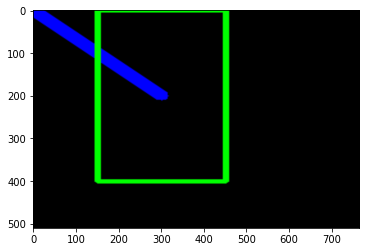

In [18]:
###### resize 绝对坐标 #########
rows,cols=my_img.shape[:2]
print(rows,cols)
res= cv2.resize(my_img,(3*cols,2*rows))
plt.imshow(res[:,:,::-1])
print(res.shape)

(128, 510, 3)


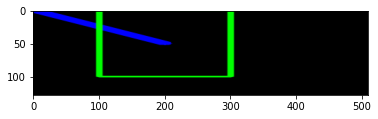

In [22]:
###### resize 相对坐标 #########
res= cv2.resize(my_img,None,fx=2,fy=0.5)
plt.imshow(res[:,:,::-1])
print(res.shape)

255 255
(510, 510, 3)


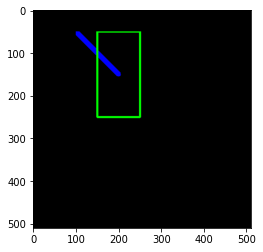

In [30]:
###### 图像平移 #########
rows,cols=my_img.shape[:2]
print(rows,cols)

######### 平移矩阵 M  ##################
M=np.float32([[1,0,100],[0,1,50]])

res2 = cv2.warpAffine((my_img),M,(cols*2,rows*2))
plt.imshow(res2[:,:,::-1])
print(res2.shape)

255 255
(510, 255, 3)


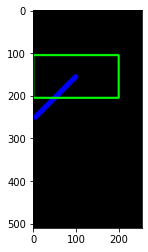

In [43]:
###### 图像旋转 #########
rows,cols=my_img.shape[:2]
print(rows,cols)

######### 旋转矩阵 M  ##################
M=cv2.getRotationMatrix2D((cols/2,rows/2),90,1)

res3=cv2.warpAffine((my_img),M,(cols,rows*2))
plt.imshow(res3[:,:,::-1])
print(res3.shape)

255 255
[[ 0.66666667  0.         66.66666667]
 [-0.33333333  1.         66.66666667]]
(255, 255, 3)


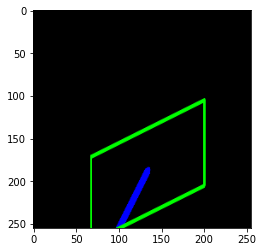

In [49]:
###### 仿射变换 #########
rows,cols=my_img.shape[:2]
print(rows,cols)

###### 一个点位置 map 到另一个点的位置
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[100,100],[200,50],[100,250]])

###### 仿射变换矩阵 #########
M=cv2.getAffineTransform(pts1,pts2)
print(M)

res4 = cv2.warpAffine(res3,M,(rows,cols))
plt.imshow(res4[:,:,::-1])
print(res4.shape)

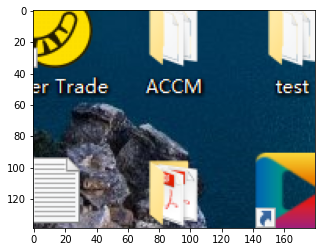

In [53]:
############### 金字塔  #####################
img = cv2.imread(r"./testPic.png")
plt.imshow(img[:,:,::-1])


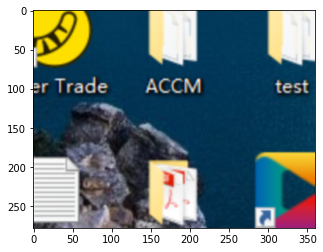

In [55]:
img_up = cv2.pyrUp(img)
plt.imshow(img_up[:,:,::-1])

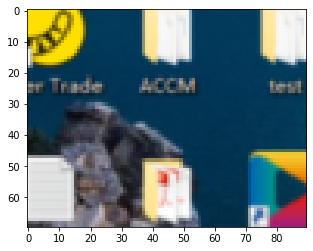

In [56]:
img_down = cv2.pyrDown(img)
plt.imshow(img_down[:,:,::-1])

(255, 255, 3) 195075


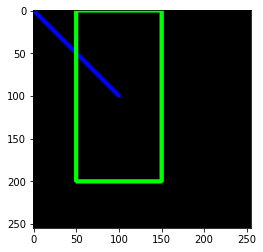

In [59]:
########### 腐蚀与膨胀 ##############
my_img = np.zeros((255,255,3),np.uint8)
plt.imshow(my_img[:,:,::-1])


####### draw ########
cv2.line(my_img, (0, 0), (100, 100), (255,0,0),3) 
cv2.rectangle(my_img,(50,0),(150,200),(0,255,0),3)

####### matplotlib show ######
plt.imshow(my_img[:,:,::-1])
print(my_img.shape,my_img.size)

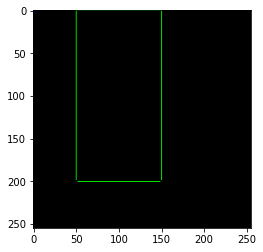

In [67]:
#### 创建核结构 #########
kernel=np.ones((5,5),np.uint8)

###### 腐蚀 ########
img2=cv2.erode(my_img,kernel)
plt.imshow(img2[:,:,::-1])


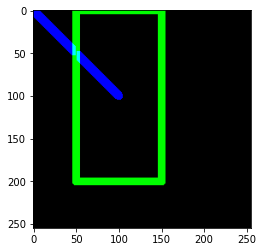

In [68]:
####### 膨胀 ######
img3=cv2.dilate(my_img,kernel)
plt.imshow(img3[:,:,::-1])

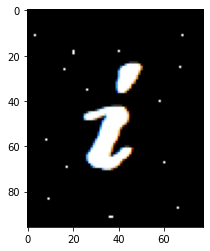

In [80]:
########## 开闭运算 除去周边噪点 开运算 原图###########
image_open = cv2.imread("./images/letter_open.png")
plt.imshow(image_open[:,:,::-1])

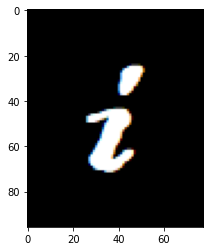

In [81]:
#### 创建核结构 #########
kernel=np.ones((2,2),np.uint8)

###### 开运算 后########
cvopen=cv2.morphologyEx(image_open,cv2.MORPH_OPEN,kernel)
plt.imshow(cvopen[:,:,::-1])

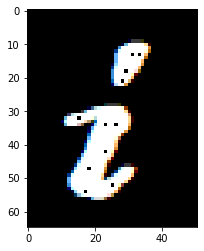

In [82]:
########## 开闭运算 除去结构中的噪点（磨皮） 闭运算 原图###########
image_close = cv2.imread("./images/letter_close.png")
plt.imshow(image_close[:,:,::-1])

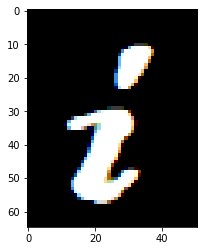

In [83]:
#### 创建核结构 #########
kernel=np.ones((2,2),np.uint8)

###### 闭运算 后########
cvopen=cv2.morphologyEx(image_close,cv2.MORPH_CLOSE,kernel)
plt.imshow(cvopen[:,:,::-1])

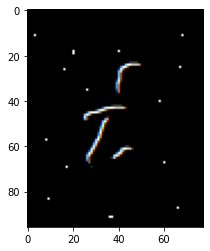

In [92]:
######## 黑帽和礼帽  开闭运算后与原图像的差值 ############

######### 礼帽 tophat 原图像与开运算之差 ###########
tophat=cv2.morphologyEx(image_open,cv2.MORPH_TOPHAT,kernel)
plt.imshow(tophat[:,:,::-1])

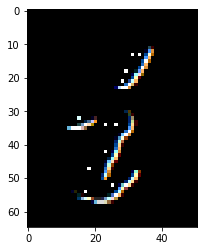

In [93]:
######### 黑帽 blackhat 原图像与闭运算之差###########
blackhat=cv2.morphologyEx(image_close,cv2.MORPH_BLACKHAT,kernel)
plt.imshow(blackhat[:,:,::-1])